# SPRING 2021
# Applied Machine Learning, HW 11 Solutions

<b><font color='red'>Instructions:</font></b>  Read all problems very carefully. Make sure that you are answering all questions included in a given problem. For every question, you are provided with a code cell to show your solution; be sure to run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 

1. In this problem, you will be working with the [Moon data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) which is a simple toy dataset often used to visualize clustering and classification algorithms. The data set contains two features which after being plotted one against the other create two interleaving half circles or "moons" on a two-dimensional plane. Each of these half circles represents one of two classes, 0 or 1. The features are stored in a two-dimensional NumPy array `X` and the class labels are stored in a one-dimensional NumPy array `y`.

  First, run the code cell below to load and vizualize the data. (Do not change the content of this cell!)

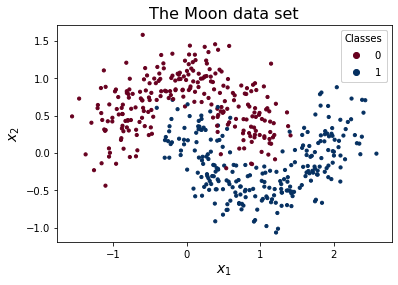

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, random_state=42, noise=0.23)

fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='RdBu', )

ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.set_title('The Moon data set', fontsize=16)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend)

plt.show()

2. Now you have the matrix of features, `X`, and the array of labels, `y`, available to you. Demonstrate that both `X` and `y` are NumPy arrays; after than print the shapes of these arrays to the screen; for the `y` array, also print the unique values to the screen (don't forget to import the NumPy library!).

In [3]:
type(X)

numpy.ndarray

In [4]:
type(y)

numpy.ndarray

In [5]:
X.shape

(500, 2)

In [6]:
y.shape

(500,)

In [7]:
import numpy as np
np.unique(y)

array([0, 1])

3. Run the code cell below to define a new function `plot_clf()` that we will be using for vizualization of different classifiers. (Do not change the content of this cell!)

In [8]:
def plot_clf(clf):
  n_grid_x=200
  ms=0.5
  plt.figure(figsize=(10, 6))

  mask_0=y==0
  mask_1=y==1

  plt.plot(X[mask_0, 0], X[mask_0, 1], 'o', color='maroon', label='0')
  plt.plot(X[mask_1, 0], X[mask_1, 1], 'o', color='darkblue', label='1')

  x_min = plt.gca().get_xlim()[0]
  x_max = plt.gca().get_xlim()[1]
  y_min = plt.gca().get_ylim()[0]
  y_max = plt.gca().get_ylim()[1]

  x1 = np.linspace(x_min, x_max, n_grid_x)
  # The number of grid point along the vertical axis
  # is adjusted to have the same horizontal and vertical
  # spacing between the grid points 
  n_grid_y=int(n_grid_x*y_max/x_max)
  x2 = np.linspace(y_min, y_max, n_grid_y)

  # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
  x1, x2 = np.meshgrid(x1, x2)
  x1 = x1.reshape(n_grid_x*n_grid_y, -1)
  x2 = x2.reshape(n_grid_x*n_grid_y, -1)

  x_grid=np.hstack((x1, x2))

  y_grid = clf.predict(x_grid)

  plt.plot(x1[y_grid==0], x2[y_grid==0], 'o', 
           color='red', ms=ms)
  plt.plot(x1[y_grid==1], x2[y_grid==1], 'o', 
           color='blue', ms=ms)

  plt.plot(X[mask_0, 0], X[mask_0, 1], 'o', 
           color='maroon')
  plt.plot(X[mask_1, 0], X[mask_1, 1], 'o', 
           color='darkblue')

  plt.xlabel(r"$x_1$", fontsize=14)
  plt.ylabel(r"$x_2$", fontsize=14)
  plt.legend(#loc='lower right', 
            fontsize=11)
  plt.show()

4. Instantiate a new decision tree classifier: set `random_state=42` and keep all other parameters at their default settings. After that fit the classifier using the Moon data set data (do not do train-test split) and use the function introduced in the previous item to vizualize the result (don't forget to pass the name of your classifier as an argument to the `plot_clf()` function).

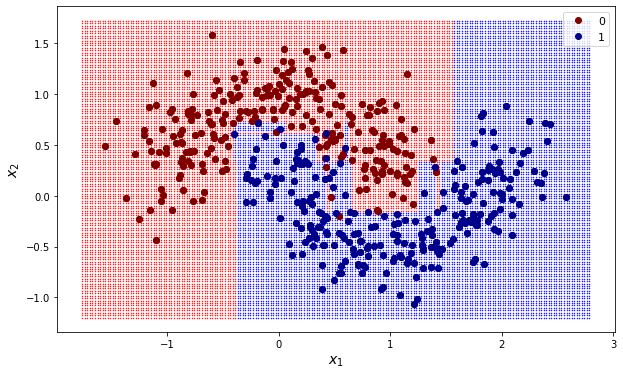

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=42)
tree.fit(X, y)
plot_clf(tree)

5. Repeat the previous item with the Random Forest classifier.

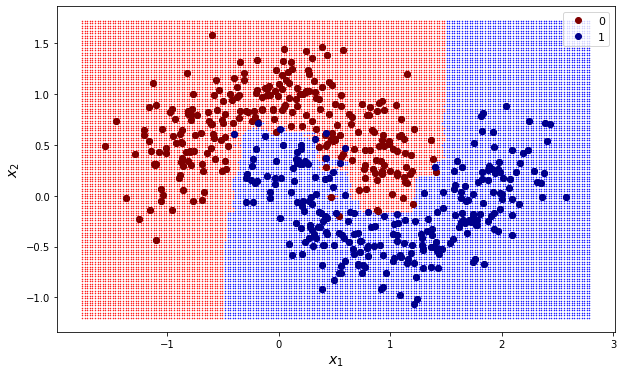

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)
rf.fit(X, y)
plot_clf(rf)

6. Use the text cell below to comment on the difference between the results. Your answer must be detailed and given in complete sentences. 

**Your answer:** The decision tree classifier is trying to fit all subtleties of the data. As a result it creates isolated regions of a given class based only on one or two data points that belong to this class. The result obtained with the Random Forest classifier looks more consistent because it has a significantly smaller number of such isolated regions. This leads us to beleive that the Random Forest classifier will demonstrate less overfitting compared to the decision tree classifier.

**Problem 2:**

1. Run the code cell below to load and visualize some polynomial data with noise.

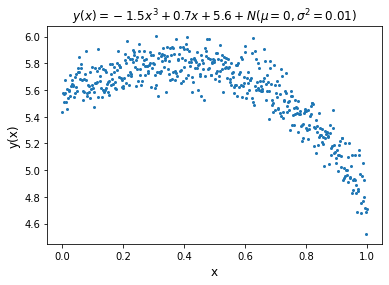

In [11]:
n=500
sc=0.1
a=-1.5
b=0.7
c=5.6

X=np.linspace(0, 1, n)
y=a*X**3+b*X+c+np.random.normal(loc=0, scale=sc, size=n)

X=X.reshape(-1, 1)

plt.plot(X, y, 'o', ms=2)
plt.title(r"$y(x) = -1.5 x^3 + 0.7 x + 5.6 + N(\mu=0, \sigma^2=0.01)$")
plt.xlabel('x', fontsize=12)
plt.ylabel('y(x)', fontsize=12)
plt.show()

2. Create a 70-30 split of the data into the training and test sets: set `random_state=42` (don't stratify since we are doing regression). 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

3. Build three pipelines each containig just two step. In the first step, scale the data with the standard scaler; in the second step perform regression with one of the following regressors:
  * a KNN regressor with the number of nearest neighbors set to 5;
  * a decision tree regressor with `min_samples_leaf=10` and `random_state=42`;
  * a Random Forest regressor with `n_estimators=500`, `min_samples_leaf=10`, and `random_state=42`.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

k=5
pipe_knn=Pipeline([
                   ('scaler', StandardScaler()), 
                   ('knn', KNeighborsRegressor(n_neighbors=k))
                   ])

pipe_tree=Pipeline([
                    ('scaler', StandardScaler()), 
                    ('tree', DecisionTreeRegressor(random_state=42,
                                                   min_samples_leaf=10))
                    ])

pipe_rf=Pipeline([
                  ('scaler', StandardScaler()), 
                  ('rf', RandomForestRegressor(random_state=42,
                                               n_estimators=500, 
                                               min_samples_leaf=10))
                  ])

4. Compute the average across folds 5-fold cross-validated RMSE score (`scoring=neg_root_mean_squared_error`) on `X_train` and `y_train` for all three of the pipelines created in the previous step. Print these scores to the screen (don't forget to convert negative RMSE scores to positive ones), compare them, and report which one of the classifires has the best preformance.

In [14]:
from sklearn.model_selection import cross_val_score

mse_knn=-cross_val_score(pipe_knn, X_train, y_train, 
                         scoring='neg_root_mean_squared_error').mean()
print(mse_knn)

mse_tree=-cross_val_score(pipe_tree, X_train, y_train, 
                          scoring='neg_root_mean_squared_error').mean()
print(mse_tree)

mse_rf=-cross_val_score(pipe_rf, X_train, y_train, 
                        scoring='neg_root_mean_squared_error').mean()
print(mse_rf)

0.11165206642690613
0.11583835284070068
0.10970087589476094


**The best regressor:** Random Forest since it has the lowest RMSE score.

5. Fit the best pipeline identified in the previous step on the training data and make predicitons on the test data; after that compute the resulting RMSE score on the test data and print the result to the screen. 

In [15]:
from sklearn.metrics import mean_squared_error

pipe_rf.fit(X_train, y_train)
y_pred=pipe_rf.predict(X_test)

rmse=mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE = {rmse:.5f}.")

RMSE = 0.10825.


5. Create a plot showing all original data points and the best fit curve obtained with the best regressor identified in item 4. Label your horizontal and vertical axes as "x" and "y", respectively. Add a title to the plot saying "Regression plot". To create the best fit curve follow these steps:
  * Use `np.linspace` to create an array of 100 evenly spaced values between the smallest and the largest values of `X` (make the limiting values inclusive). Call this array `x_grid`.
  * Predict the target values on `x_grid` using an appropriate sklearn method and the best pipeline from item 4. Save the result as `y_grid`.
  * On the same set of axes, plot `y_grid` versus `x_grid`. This is your best fit line. Use the red color for this line and set `linewidth=2`.
  * Create a legend for the best fit curve stating the name of the regressor used to create it.

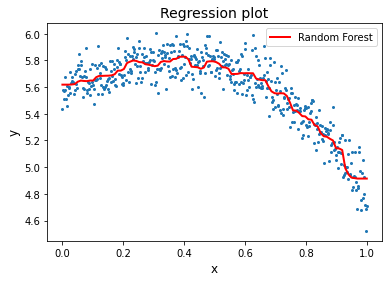

In [16]:
plt.plot(X, y, 'o', ms=2)
plt.title("Regression plot", fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

x_grid=np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_grid=pipe_rf.predict(x_grid)
plt.plot(x_grid, y_grid, '-', color='red', 
         linewidth=2, label='Random Forest')
plt.legend()

plt.show()

**Problem 3** (do this problem after our class on Monday, May 3rd!)

1. Run the code cell below to create and visualize some clustering data.

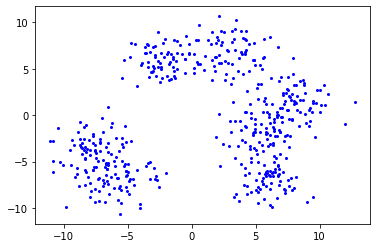

In [24]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=500, centers=7,
                  cluster_std=1.5, #1.5, 
                  n_features=2, 
                  random_state=142)


plt.plot(X[:, 0], X[:, 1], 'o', color='blue', ms=2)
plt.show()

2. In this problem, you are not given any target variable -- this is an example of *unsupervised machine learning*. The feature matrix `X` contains only two columns, so the data can be easily plotted on a plane. This is what we did in the picture shown above. It is clear that the data set contains clusters of data. However, it is not clear how many clusters we have in total: 3, 4, 5, or, maybe, 100?

  Use the k-Means Clustering algorithm to split the data into 3 clusters and plot the result coloring the data points based on the cluster they belong to (set `s=5` in the plt.scatter() function). Your plot must also show the centers of each cluster in red (use `s=100` and `alpha=0.7`).

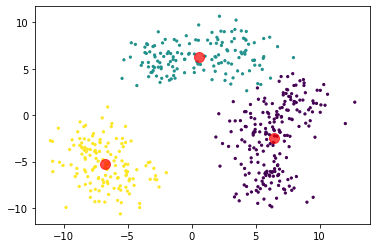

In [25]:
from sklearn.cluster import KMeans

km3=KMeans(n_clusters=3)
km3.fit(X)
y3=km3.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y3, s=5)

cent3=km3.cluster_centers_
plt.scatter(cent3[:, 0], cent3[:, 1], c='red', alpha=0.7, s=100)

plt.show()

3. Repeat the previous item with 5 clusters.

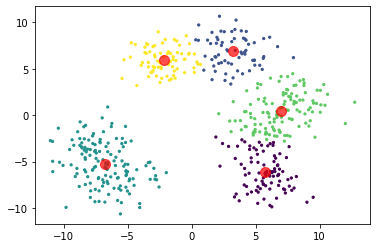

In [26]:
km5=KMeans(n_clusters=5)
km5.fit(X)
y5=km5.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y5, s=5)

cent5=km5.cluster_centers_
plt.scatter(cent5[:, 0], cent5[:, 1], c='red', alpha=0.7, s=100)

plt.show()

4. Set up a `for`-loop computing the *inertia* parameter of the k-Means Clustering fitted on these data for the number of clusters in the range from 1 to 15. At the end of each cylce save the current number of clusters and the corresponding intertia in two different lists. After the `for`-loop is finished plot the inertia as a function of the number of clusters. Create some meaningful axis labels and title.

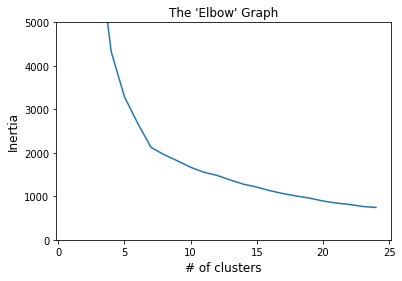

In [27]:
nclust=[]
inertia=[]

for n in range(1, 25):
  km=KMeans(n_clusters=n)
  km.fit(X)
  nclust.append(n)
  inertia.append(km.inertia_)

plt.plot(nclust, inertia, '-')
plt.title("The 'Elbow' Graph")
plt.xlabel("# of clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.ylim(0, 5000)
plt.show()

5. The actual number of clusters that was used to create these data was seven. Does this sound reasonable based on the *elbow* graph your created in the previous step?

  Repeat step 2 with 7 clusters and visually inspect the result.

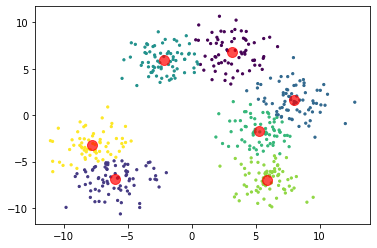

In [28]:
km7=KMeans(n_clusters=7)
km7.fit(X)
y7=km7.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y7, s=5)

cent7=km7.cluster_centers_
plt.scatter(cent7[:, 0], cent7[:, 1], c='red', alpha=0.7, s=100)

plt.show()